## K近傍法 K-Neighbor 
教師あり分類問題 supervised classification problem



### Basic Libraries

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Libraries for Learning Models

In [15]:
from sklearn import neighbors
from sklearn import  metrics
from sklearn.model_selection import train_test_split, cross_val_score

### 1. Data Preparation
XOR のデータを使用する

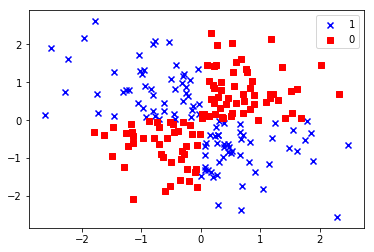

In [18]:
X = np.random.randn(200, 2) # 200個の2次元データ
y = np.logical_xor(X[:, 0] >0, X[:, 1]>0) # => True, False
y = np.where(y, 1, 0)

plt.scatter(X[y==1, 0], X[y==1, 1], c='b', marker='x', label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show()

### 3. Preprocessing Datasets
今回は不要

### 4. Training Model
K-nearest neighbor

In [19]:
clf = neighbors.KNeighborsClassifier(5, weights='distance')

### 5. Evaluation Data
K分割交差検証法を用いて性能評価を行う

In [21]:
scores = cross_val_score(clf, X, y, cv=10) # 分割数10
print('mean scores: %f'%scores.mean())
print('standard deviation', scores.std())

mean scores: 0.929474
standard deviation 0.055982783265577866


### neighbors.KNeighborsClassifier
#### parameters
- n_neighbors: 参照する隣接データ数
- weights: 隣接データに対する重み付け
    - uniform: 一様
    - distance: 距離に反比例
    - \[callable\]: 自分で定義可能
- algorithm: 隣接データを探索するためのアルゴリズム
    - ball_tree: ボールツリー
    - kd_tree: KDTree
    - brute: 全探索
    - auto
- leaf_size: BallTree や KdTree のパラメータ
- p: Minkovski 距離のパラメータp,  p=1: manhattan, p=2: euclidean
- metric: DistanceMetric クラスの距離尺度を使用可能
- metric_params: DistanceMetric クラスに渡すパラメータ
- n_jobs: CPU数

#### Methods
- fit(X, y)
- get_params()
- kneighbors(\[X, 